# Research Questions

## RQ1: How does the numeric rating/score of reviews affect the booking rates of listings?

- handle missing values (henry)
- coorelation analysis (Brandon)
- histogram/scatterplot for some key variables 
- summary stats (nawal)


1) If your research questions have been updated from the proposal. What's your new research questions?
2) Describe if your methodology has been updated since milestone 1 (proposal) and how. 
3) Describe your current results, e.g., finding from data exploration, answer to research questions 1. 
4) Update the member contribution section based on progress so far.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

(20386, 75)
(8056, 75)
(39202, 75)
(91778, 75)
(25480, 75)
(511139, 6)
(378989, 6)
(986810, 6)
(1649190, 6)
(560773, 6)


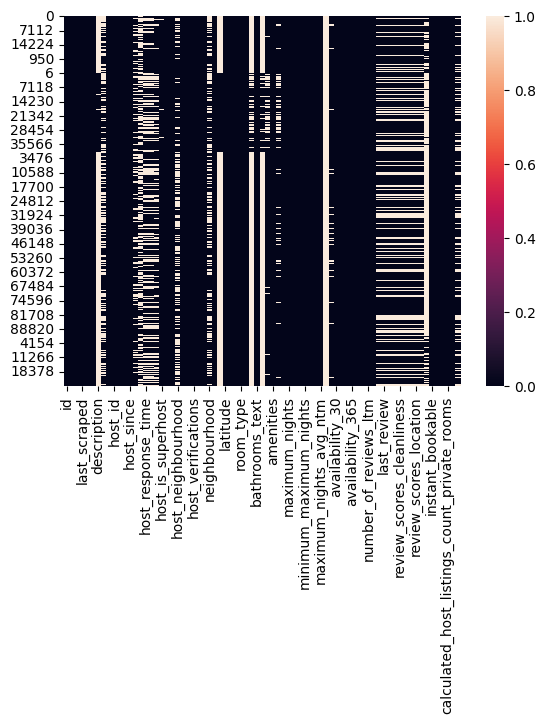

In [2]:
def combine_data(source_folder_name="raw-dataset"):
    
    locations = ['toronto','sanfran','nyc','london','sydney']
    types = ['listings', 'reviews']

    global listings, reviews
    listings = pd.DataFrame()
    reviews = pd.DataFrame()

    for t in types:
        
        data = []
        for l in locations:
            filename = f"./{source_folder_name}/{l}_{t}.csv"
            d = pd.read_csv(filename)
            data.append(d)
            print(d.shape)

        if t == 'listings':
            listings = pd.concat(data)

        if t == 'reviews':
            reviews = pd.concat(data)

def visualize_missing_values(df):
    sns.heatmap(df.isnull())
    
combine_data()

visualize_missing_values(listings)

In [3]:


listings['price']

0           $45.00
1          $180.00
2           $34.00
3           $45.00
4           $63.00
           ...    
25475      $217.00
25476    $1,689.00
25477      $920.00
25478      $429.00
25479      $203.00
Name: price, Length: 184902, dtype: object

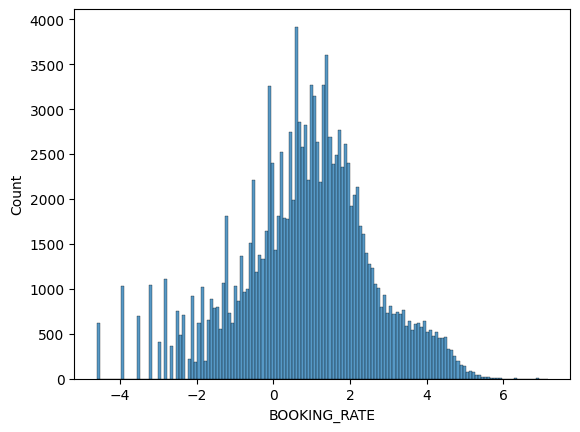

In [22]:
short_term_listings = listings[listings['minimum_nights_avg_ntm'] < 100]
short_term_listings = short_term_listings[short_term_listings['reviews_per_month'] < 20]


short_term_listings['BOOKING_RATE'] = np.log(short_term_listings['minimum_nights'] * short_term_listings['reviews_per_month'])
# sns.histplot(short_term_listings['reviews_per_month'])
sns.histplot(short_term_listings['BOOKING_RATE'])
plt.show()



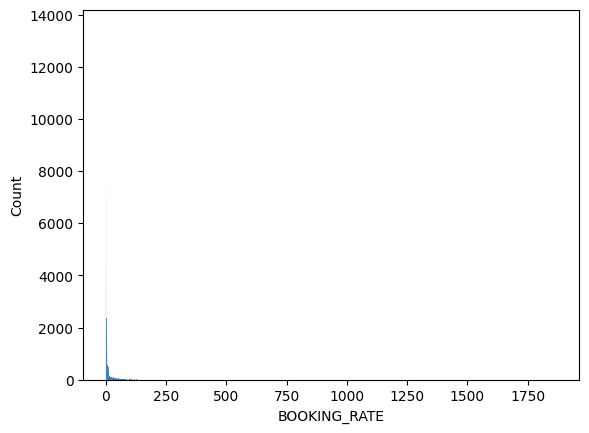

In [5]:

# WITHOUT LOG

listings['BOOKING_RATE'] = listings['minimum_nights'] * listings['reviews_per_month']
sns.histplot(listings['BOOKING_RATE'])
plt.show()

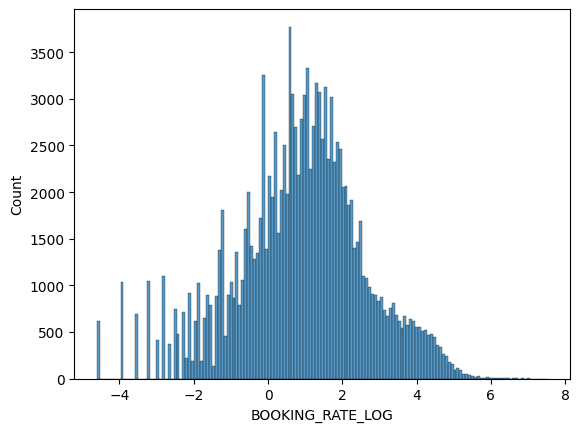

In [6]:
# listings['BOOKING_RATE'] = listings['minimum_nights_avg_ntm'] * listings['reviews_per_month']

# WITH LOG
listings['BOOKING_RATE_LOG'] = np.log(listings['minimum_nights'] * listings['reviews_per_month'])
sns.histplot(listings['BOOKING_RATE_LOG'])
plt.show()


In [8]:
# sns.scatterplot(data=listings, x='review_scores_rating', y='BOOKING_RATE_LOG')
# plt.scatter(listings['r?eview_scores_rating'], listings['BOOKING_RATE_LOG'])
plt.show()

In [10]:
# List of column names you want to include in the correlation analysis
columns_to_include = ['accommodates', 'beds', 'minimum_nights', 'maximum_nights', 
                        'availability_30', 'availability_60', 'availability_90', 
                        'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
                        'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy',
                        'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
                        'review_scores_location', 'review_scores_value']

# Select only the specified columns
listings_selected = listings[columns_to_include]

# Now compute the correlation matrix for the selected columns
correlation_matrix = listings_selected.corr()
print(correlation_matrix)

                             accommodates      beds  minimum_nights  \
accommodates                     1.000000  0.829580       -0.054365   
beds                             0.829580  1.000000       -0.023127   
minimum_nights                  -0.054365 -0.023127        1.000000   
maximum_nights                  -0.003002 -0.001679        0.000430   
availability_30                  0.050773  0.022939       -0.007400   
availability_60                  0.060242  0.030320       -0.032761   
availability_90                  0.060660  0.030618       -0.040488   
availability_365                 0.075346  0.048766       -0.018979   
number_of_reviews               -0.021210 -0.018633       -0.065132   
number_of_reviews_ltm            0.006906 -0.001841       -0.134621   
number_of_reviews_l30d           0.014883 -0.001036       -0.142477   
review_scores_rating             0.008009  0.006940       -0.013197   
review_scores_accuracy          -0.008136 -0.007572       -0.002648   
review

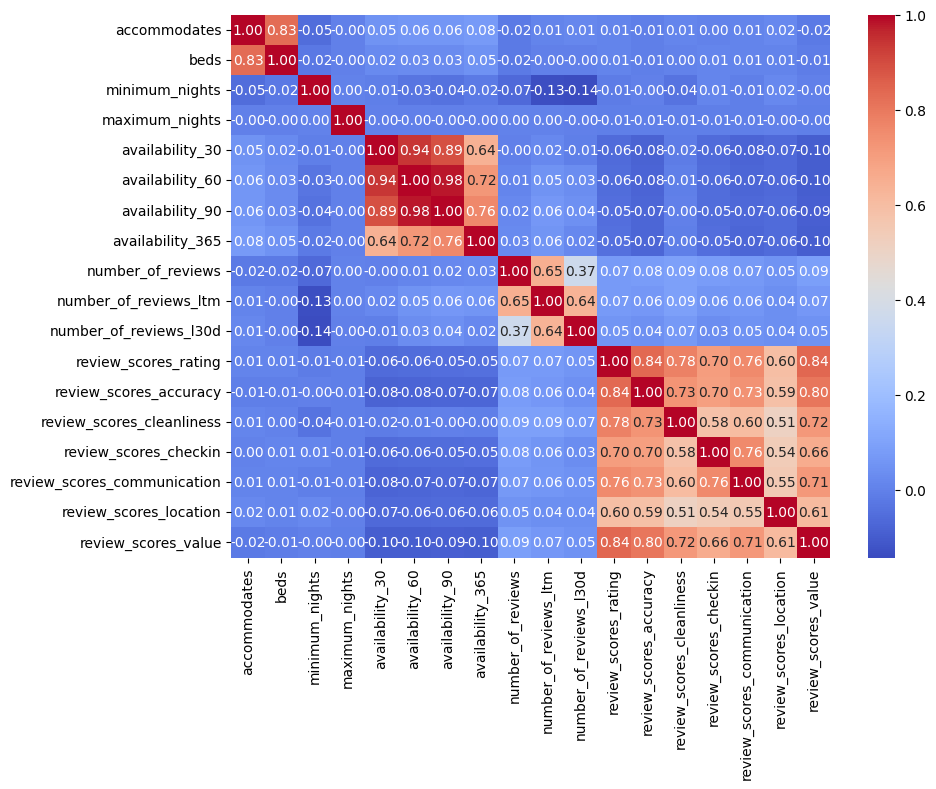

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.tight_layout()
plt.show()

<Axes: ylabel='minimum_nights_avg_ntm'>

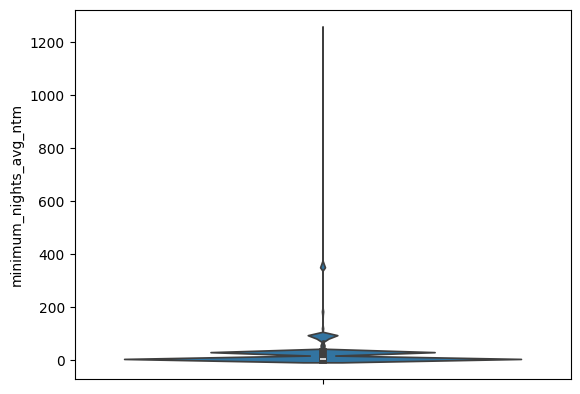

In [16]:
sns.violinplot(listings['minimum_nights_avg_ntm'])

In [ ]:
def get_full_summary(df, exclude_columns=None):
    
    if exclude_columns is None:
        exclude_columns = []
    
    # Exclude specified columns
    df_filtered = df.drop(columns=exclude_columns)
    
    # Numeric summary using describe() for numeric columns, updated include parameter
    numeric_summary = df_filtered.describe(include='number')
    
    # Adding median to numeric summary. Adjusting the method for potential compatibility issues
    try:
        median = df_filtered.median(numeric_only=True).to_frame().T.rename(index={0: 'median'})
    except TypeError:  # In case of unexpected TypeError, fall back to excluding non-numeric
        median = df_filtered.select_dtypes(include='number').median().to_frame().T.rename(index={0: 'median'})
    
    numeric_summary = pd.concat([numeric_summary, median], axis=0)

    # Categorical summary using describe() for categorical columns, excluding specified columns
    categorical_summary = df_filtered.describe(exclude='number')
    
    return {'numeric_summary': numeric_summary, 'categorical_summary': categorical_summary}


# Specify columns to exclude
exclude_columns = ['id', 'listing_url', 'scrape_id', 'host_id', 'host_url', 
                       'host_thumbnail_url', 'host_picture_url', 'name', 'description', 
                       'neighborhood_overview', 'host_about', 'amenities', 'bathrooms_text', 
                       'last_scraped', 'host_since', 'calendar_last_scraped', 'first_review', 
                       'last_review', 'source', 'host_neighbourhood', 'calendar_updated', 'license', 'picture_url']
full_summary = get_full_summary(reviews, None)

print("Numeric Summary:")
print(full_summary['numeric_summary'])
print("\nCategorical Summary:")
print(full_summary['categorical_summary'])

In [ ]:
def plot_histograms(df, column1, column2):
  
    # Set up the matplotlib figure and axes for two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot the first column histogram
    df[column1].hist(ax=axes[0], bins=20, color='skyblue', edgecolor='black')
    axes[0].set_title(f'Histogram of {column1}')
    axes[0].set_xlabel(column1)
    axes[0].set_ylabel('Frequency')
    
    # Plot the second column histogram
    df[column2].hist(ax=axes[1], bins=20, color='lightgreen', edgecolor='black')
    axes[1].set_title(f'Histogram of {column2}')
    axes[1].set_xlabel(column2)
    axes[1].set_ylabel('Frequency')
    
    # Ensure the layout is not too tight
    plt.tight_layout()
    
    # Display the plots
    plt.show()



In [ ]:
import pandas as pd

def analyze_data_cleaning_needs(df):
    """
    Analyze a CSV file for common data cleaning needs.
    
    Args:
    csv_file_path (str): The path to the CSV file.
    
    Returns:
    dict: A summary of findings including missing values, data types, duplicates, and potential outliers.
    """
    
    # Initialize the analysis dictionary
    analysis = {
        "missing_values": df.isnull().sum(),
        "data_types": df.dtypes,
        "duplicate_rows": df.duplicated().sum(),
        "potential_outliers": {}
    }
    
    # Check for potential outliers using IQR
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outlier_count = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))].shape[0]
        if outlier_count > 0:
            analysis["potential_outliers"][column] = outlier_count
            
    return analysis

analyze_data_cleaning_needs(listings)

In [ ]:
def plot_scatter(df, column_x, column_y):
  
    plt.figure(figsize=(10, 6))  # Set the figure size
    plt.scatter(df[column_x], df[column_y], alpha=0.5)  # Create scatter plot with some transparency
    plt.title(f'Scatter Plot of {column_x} vs. {column_y}')  # Set the title of the plot
    plt.xlabel(column_x)  # Set the x-axis label
    plt.ylabel(column_y)  # Set the y-axis label
    plt.grid(True)  # Add a grid for better readability
    plt.show()  # Display the plot

plot_scatter(listings, 'reviews_per_month', 'availability_30')


In [ ]:
#aggregate scores togther 
# Filter out the relevant score columns
score_columns = [
    'review_scores_rating', 
    'review_scores_accuracy', 
    'review_scores_cleanliness', 
    'review_scores_checkin', 
    'review_scores_communication', 
    'review_scores_location', 
    'review_scores_value'
]

# Create a new DataFrame with only the score columns
scores_df = df[score_columns]

# Calculate the average score for each listing
# replace NaN with the column mean (considering only non-missing values for each score)
scores_df.fillna(scores_df.mean(), inplace=True)

# Calculate the aggregated score as the mean across the columns for each row
df['aggregated_score'] = scores_df.mean(axis=1)

# Inspect the new DataFrame with the aggregated score
print(df[['id', 'aggregated_score']].head())


In [ ]:
print(df[[
    'review_scores_rating', 
    'review_scores_accuracy', 
    'review_scores_cleanliness', 
    'review_scores_checkin', 
    'review_scores_communication', 
    'review_scores_location', 
    'review_scores_value'
]])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Let's assume 'df' is your DataFrame and it has been loaded with your dataset
# Replace 'your_dataframe' with the actual variable name of your DataFrame

# Replace the column names with the actual column names from your DataFrame
dependent_var = 'BOOKING_RATE_LOG'
independent_vars = [
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value'
]

listings_withReviews = listings.dropna(subset=independent_vars + [dependent_var])

# Split the data into independent X and dependent y variables
X = listings_withReviews[independent_vars]
y = listings_withReviews[dependent_var]

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model with the training data
model.fit(X_train, y_train)

# Predict the booking rates with the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the model evaluation
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fitting the regression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
print(lr.summary())

In [ ]:
dependent_var = 'BOOKING_RATE_LOG'
independent_vars = [
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value'
]


## RQ2: How does the sentiment and language used in Airbnb text reviews correlate with booking rate?

In [155]:
#RQ2 

import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from langdetect import detect
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

def combine_data(source_folder_name="raw-dataset"):
    locations = ['toronto', 'sanfran', 'nyc', 'london', 'sydney']
    types = ['listings', 'reviews']
    global listings, reviews
    listings = pd.DataFrame()
    reviews = pd.DataFrame()

    for t in types:
        data = []
        for l in locations:
            filename = f"./{source_folder_name}/{l}_{t}.csv"
            d = pd.read_csv(filename)
            data.append(d)

        if t == 'listings':
            listings = pd.concat(data)
        if t == 'reviews':
            reviews = pd.concat(data)

combine_data()

# After combining, immediately calculate the booking rate log
listings['BOOKING_RATE_LOG'] = np.log(listings['minimum_nights'] * listings['reviews_per_month'] + 1)  # +1 to avoid log(0)

# Count reviews for each listing
review_counts = reviews['listing_id'].value_counts()

# Get the IDs of listings with between 100 and 300 reviews
listings_with_100_to_300_reviews = review_counts[(review_counts >= 100) & (review_counts <= 300)].index

# Randomly sample 10,000 listing IDs (or all available if less than 10,000)
random_sample_listings = np.random.choice(listings_with_100_to_300_reviews, size=min(10000, len(listings_with_100_to_300_reviews)), replace=False)

# Filter reviews for these listing IDs
reviews_for_sampled_listings = reviews[reviews['listing_id'].isin(random_sample_listings)]

# Function to sample 5 reviews per listing
def sample_20_reviews(group):
    return group.sample(n=20, replace=False)  # Ensure sampling without replacement

# Apply the function to each group of listing reviews
sampled_reviews = reviews_for_sampled_listings.groupby('listing_id').apply(sample_20_reviews).reset_index(drop=True)

# Print the number of sampled listings and reviews
print(f"Number of sampled listings: {len(random_sample_listings)}")
print(f"Total number of sampled reviews: {len(sampled_reviews)}")
pled_reviews = reviews_for_sampled_listings.groupby('listing_id').apply(sample_20_reviews).reset_index(drop=True)

# Store unique listing IDs
sampled_listing_ids = set(sampled_reviews['listing_id'].unique())
print(f"Stored {len(sampled_listing_ids)} unique listing IDs for later use.")

# Define a function to preprocess text data
def preprocess_text(text):
    try:
        if detect(text) != 'en':
            return None
    except:
        return None
    lower_text = text.lower()
    clean_text = ''.join([char for char in lower_text if char not in string.punctuation and not char.isdigit()])
    words = clean_text.split()
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    filtered_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Apply preprocessing to each review
sampled_reviews['processed_comments'] = sampled_reviews['comments'].apply(preprocess_text)
sampled_reviews.dropna(subset=['processed_comments'], inplace=True)

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    if text is None:
        return 0
    return sia.polarity_scores(text)['compound']

sampled_reviews['sentiment_score'] = sampled_reviews['processed_comments'].apply(get_sentiment)

# Calculate average sentiment for each listing
average_sentiment = sampled_reviews.groupby('listing_id')['sentiment_score'].mean().reset_index()
average_sentiment.columns = ['listing_id', 'average_sentiment']

# Merge average sentiment with listings data
listings_with_sentiment = pd.merge(listings, average_sentiment, left_on='id', right_on='listing_id', how='inner')

def categorize_sentiment(score):
    if score >= 0.8:
        return 'High Positive'
    elif score >= 0.2:
        return 'Positive'
    elif score > -0.2:
        return 'Neutral'
    elif score >= -0.8:
        return 'Negative'
    else:
        return 'High Negative'

# Apply the categorization function to your sentiment scores
listings_with_sentiment['sentiment_category'] = listings_with_sentiment['average_sentiment'].apply(categorize_sentiment)

# Correlation calculation
correlation = listings_with_sentiment[['average_sentiment', 'BOOKING_RATE_LOG']].corr()
print(correlation)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\henry\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\henry\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\henry\AppData\Roaming\nltk_data...
C:\Users\henry\AppData\Local\Temp\ipykernel_11060\722909734.py:56: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_reviews = reviews_for_sampled_listings.groupby('listing_id').apply(sample_20_reviews).reset_index(drop=True)


Number of sampled listings: 8900
Total number of sampled reviews: 178000


C:\Users\henry\AppData\Local\Temp\ipykernel_11060\722909734.py:61: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pled_reviews = reviews_for_sampled_listings.groupby('listing_id').apply(sample_20_reviews).reset_index(drop=True)


Stored 8900 unique listing IDs for later use.
                   average_sentiment  BOOKING_RATE_LOG
average_sentiment           1.000000         -0.012764
BOOKING_RATE_LOG           -0.012764          1.000000


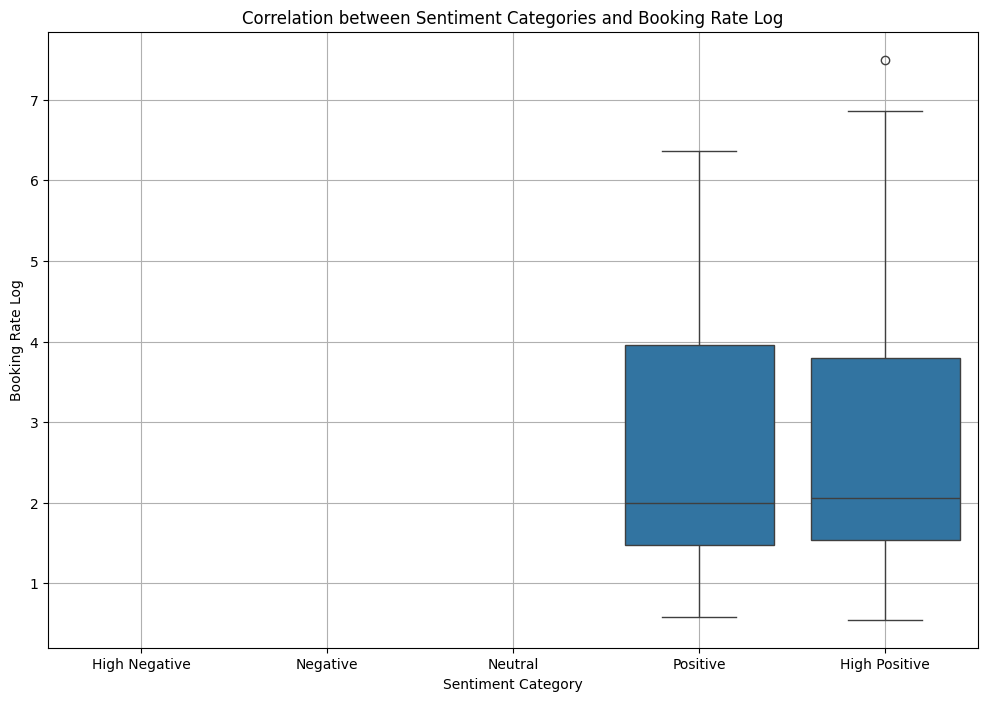

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a categorical scatter plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='sentiment_category', y='BOOKING_RATE_LOG', data=listings_with_sentiment, order=['High Negative', 'Negative', 'Neutral', 'Positive', 'High Positive'])
plt.title('Correlation between Sentiment Categories and Booking Rate Log')
plt.xlabel('Sentiment Category')
plt.ylabel('Booking Rate Log')
plt.grid(True)
plt.show()



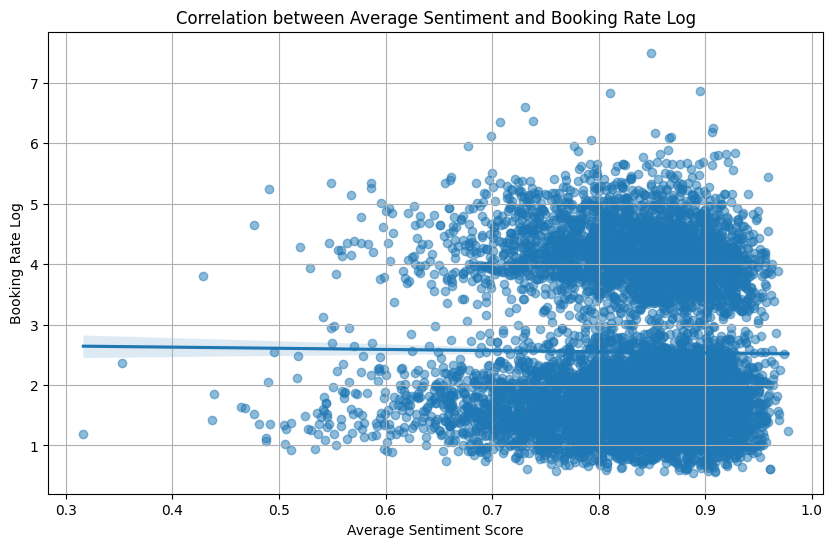

In [ ]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='average_sentiment', y='BOOKING_RATE_LOG', data=listings_with_sentiment, scatter_kws={'alpha':0.5})
plt.title('Correlation between Average Sentiment and Booking Rate Log')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Booking Rate Log')
plt.grid(True)
plt.show()

In [ ]:
# After sampling the listing IDs
print(f"Number of sampled listings: {len(random_sample_listings)}")

# Apply the function to each group of listing reviews
sampled_reviews = reviews_for_sampled_listings.groupby('listing_id').apply(sample_20_reviews).reset_index(drop=True)

# Print the number of reviews that will be used moving forward
print(f"Total number of reviews moving forward: {len(sampled_reviews)}")


Number of sampled listings: 8900
Total number of reviews moving forward: 178000


In [ ]:
#checking sentiment accuracy 

import pandas as pd

# Assuming `sampled_reviews` already has a column `sentiment_score` calculated
def categorize_sentiment(score):
    if score >= 0.8:
        return 'High Positive'
    elif score >= 0.2:
        return 'Positive'
    elif score > -0.2:
        return 'Neutral'
    elif score >= -0.8:
        return 'Negative'
    else:
        return 'High Negative'

# Apply categorization
sampled_reviews['sentiment_category'] = sampled_reviews['sentiment_score'].apply(categorize_sentiment)

# Count reviews in each sentiment category
sentiment_counts = sampled_reviews['sentiment_category'].value_counts()
print("Sentiment Counts:\n", sentiment_counts)

# Function to sample 3 reviews from each category
def sample_reviews(group):
    return group.sample(n=min(3, len(group)))

# Group by 'sentiment_category' and apply the sampling function
sampled_by_category = sampled_reviews.groupby('sentiment_category').apply(sample_reviews)

# Drop the multi-index created by groupby if necessary
sampled_by_category.reset_index(drop=True, inplace=True)

# Print the sampled reviews for each category
for category in sampled_by_category['sentiment_category'].unique():
    print(f"\nCategory: {category}")
    for review in sampled_by_category[sampled_by_category['sentiment_category'] == category]['comments']:
        print(f"- {review}")



Sentiment Counts:
 sentiment_category
High Positive    116149
Positive          37098
Neutral            2699
Negative            915
High Negative       176
Name: count, dtype: int64

Category: High Negative
- very poor response from the host. Toilet was dirty, w/c was unstable, moving from the base, used soaps and toiletry was kept. kind of a store room/out house converted to  a so called studio. Guests looking for quality then this is not the place. we kept sending messages to  fix wifi problem but we did not get any response from the host. we were not provided with the wifi. AC was to be used only 15 mins at a time,  were the instructions. Not recommended for anyone to stay. we had no option and couldn't find another accommodation  in that area due to short notice.  Bad experience.
- The apartment was not cleaned and stinky and was as the previous guest had left it: dirty towels hung in the bathroom, and in the rooms, beds with the linens where the previous guest had slept into, di

## RQ3: How do the latency of host responses and communcation rating impact booking rate?

In [84]:
# preparing dataframe for 3rd research question

relevant_columns_rq3 = [
    'id',
    'review_scores_communication',
    'host_response_time',
    'BOOKING_RATE_LOG'
]

rq3 = listings[relevant_columns_rq3]

# filter out null values, since we need all 3 to compute
rq3 = rq3.dropna(subset=['review_scores_communication', 'BOOKING_RATE_LOG'])

def map_response_time(response_catagory):
    if response_catagory == 'within an hour':
        return 1
    elif response_catagory == 'within a few hours':
        return 5 # few = max five hours
    elif response_catagory == 'within a day':
        return 24
    elif response_catagory == 'a few days or more':
        return 72 # estimated of 3 days 
    
    return -1 # -1 meaning we don't know

rq3['HOST_RESPONSE_TIME_SCORED'] = rq3['host_response_time'].apply(map_response_time)


None
within an hour
within a few hours
within a day
a few days or more


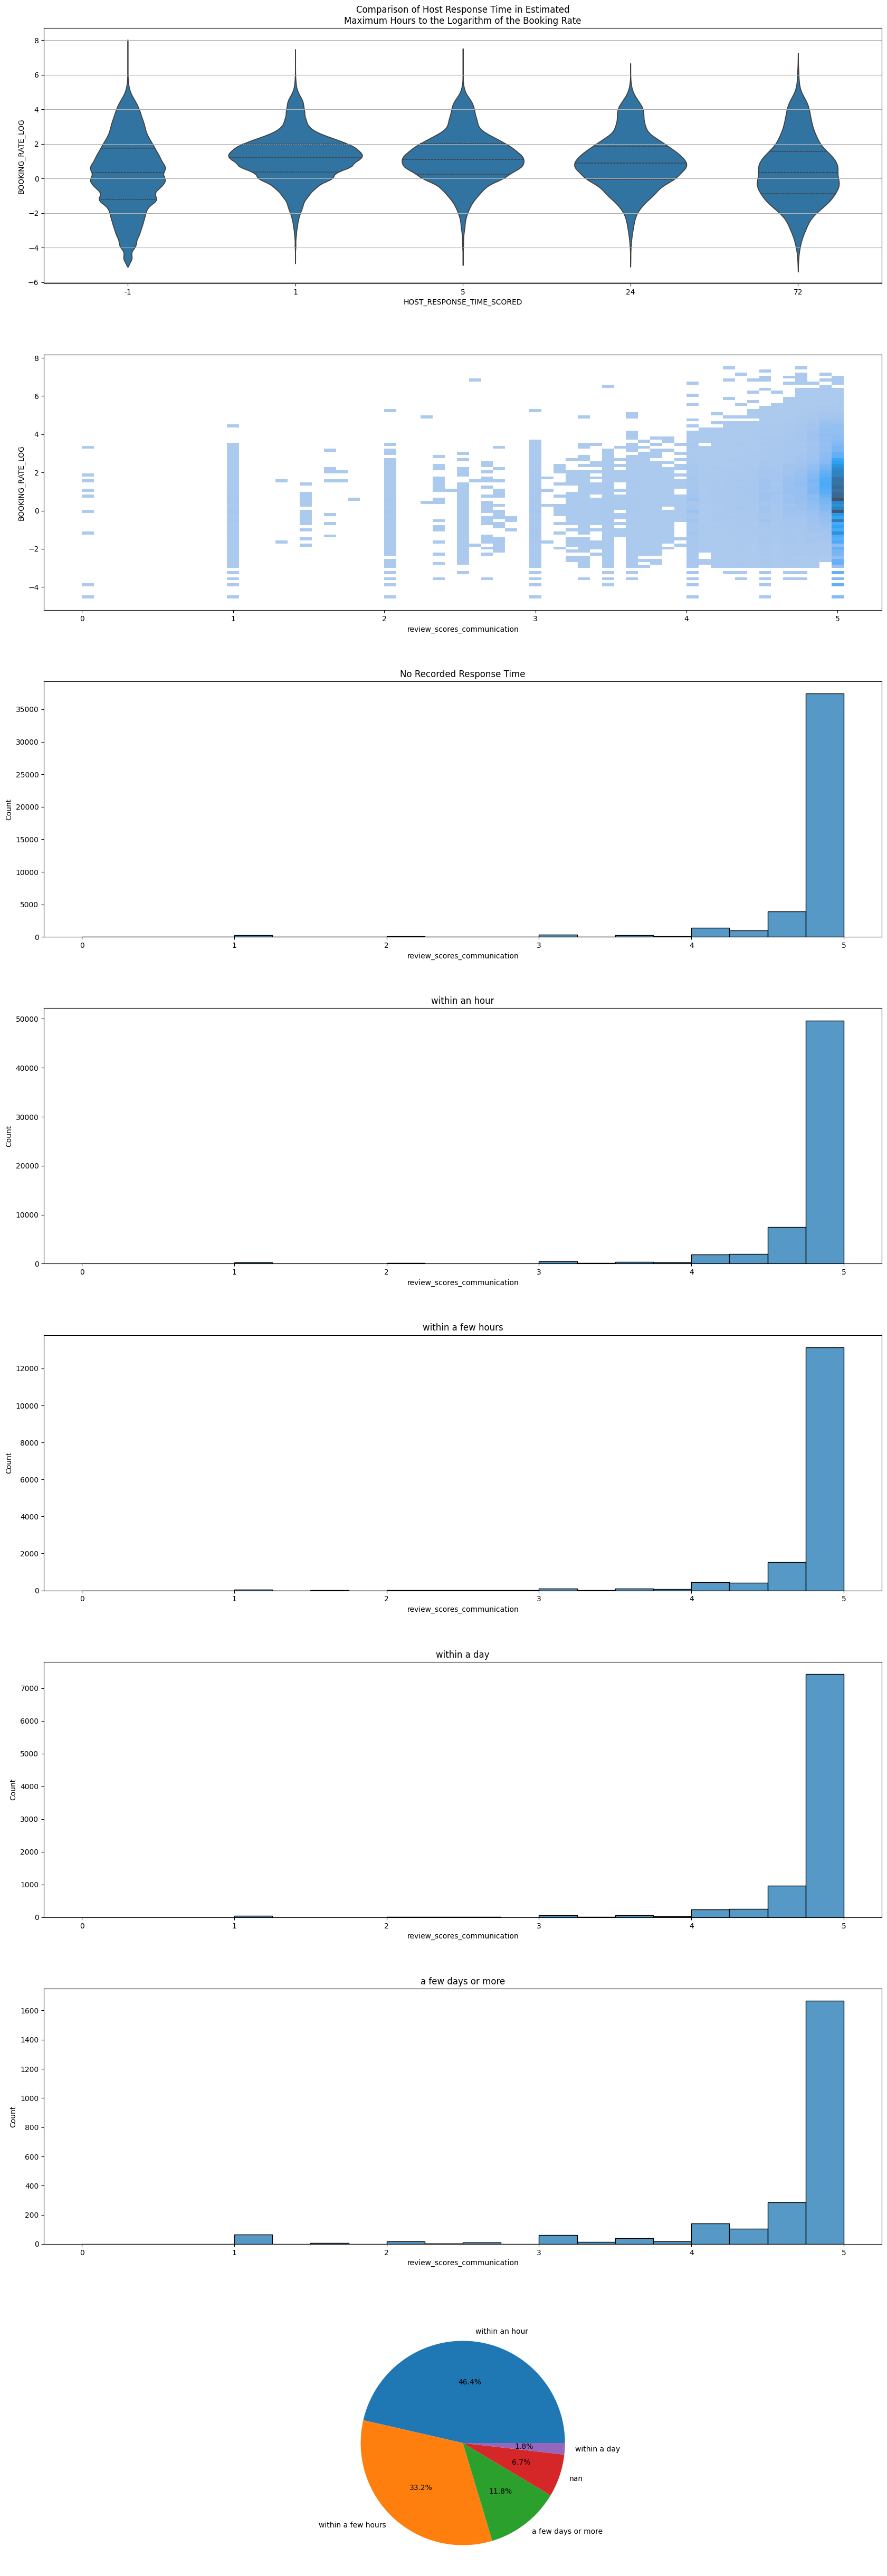

In [161]:
fig, ax = plt.subplots(8, 1, figsize=(18, 50))

sns.violinplot(rq3, ax=ax[0], x='HOST_RESPONSE_TIME_SCORED', y='BOOKING_RATE_LOG', inner='quart')
ax[0].set_title('Comparison of Host Response Time in Estimated\nMaximum Hours to the Logarithm of the Booking Rate')
ax[0].grid(axis='y')


sns.histplot(rq3, ax=ax[1], x='review_scores_communication', y='BOOKING_RATE_LOG', binwidth=(0.08, 0.16))

categories = [None, 'within an hour', 'within a few hours', 'within a day', 'a few days or more']
for i,category in enumerate(categories):
    print(category)
    subset_rq3 = rq3[rq3['HOST_RESPONSE_TIME_SCORED'] == map_response_time(category)]

    sns.histplot(subset_rq3, ax=ax[2+i], x='review_scores_communication', bins=20, binrange=(0,5))
    ax[2+i].set_title("No Recorded Response Time" if category is None else category)
    # ax[2+i].set_yscale('log')

response_counts = rq3['host_response_time'].value_counts(dropna=False)
plt.pie(response_counts, autopct='%1.1f%%', labels=rq3['host_response_time'].unique())

# normalized_counts = rq3.groupby('host_response_time').size() / len(rq3)
# sns.histplot(
#     rq3, 
#     ax=ax[2+i], x='review_scores_communication', 
#     hue='host_response_time',
#     # hue_order=normalized_counts.index,
#     bins=10, 
#     binrange=(0,5), 
#     stat='count',
#     multiple='dodge'

# )
# ax[2+i].set_title("test")
# ax[2+i].set_yscale('log')

# sns.histplot(rq3, ax=ax[7], x='HOST_RESPONSE_TIME_SCORED')
# ax[7].set_title("Distribution of Host Response Times")


fig.tight_layout(pad=5.0)


,id,review_scores_communication,host_response_time,BOOKING_RATE_LOG,HOST_RESPONSE_TIME_SCORED
0,24018771,4.78,within an hour,0.604316,1
3,842991103042611460,5.00,within an hour,2.658860,1
4,1004965626999219484,5.00,within an hour,1.934416,1
5,924249347864823562,5.00,within an hour,-0.713350,1
6,51907095,5.00,within an hour,-1.386294,1
...,...,...,...,...,...
25471,679969354455556146,4.91,within an hour,1.000632,1
25473,954604282011021722,5.00,within an hour,0.113329,1
25475,859898424946080662,4.92,within an hour,1.007958,1
25478,993905903709727165,5.00,within an hour,1.386294,1


In [178]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Input



t = rq3.groupby('host_response_time')
model_rq3 = rq3[rq3['HOST_RESPONSE_TIME_SCORED'] != -1]

X = model_rq3.drop(columns=['id', 'host_response_time', 'BOOKING_RATE_LOG'])
y = model_rq3['BOOKING_RATE_LOG']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4951)



scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Sequential([
    Input(shape=(X_train_scaled.shape[1], )),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1),
])

c:\Users\henry\OneDrive\Documents\GitHub\CISC-351-Group-10\env\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Argument `name` must be a string and cannot contain character `/`. Received: name=<Dense name=dense_17, built=False> (of type <class 'keras.src.layers.core.dense.Dense'>)